In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Input,LSTM,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [7]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000,28,28)).astype('float32')/255
test_images=test_images.reshape((10000,28,28)).astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

4422102/4422102 [==============================] - 0s 0us/step


In [15]:
input_shape = (28,28)
inputs = Input(shape=input_shape)
rnn_layer = LSTM(128)(inputs)
outputs = Dense(10,activation='softmax')(rnn_layer)
model = Model(inputs=inputs,outputs=outputs)

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(train_images,train_labels,validation_split=0.2,epochs=5,batch_size=64)

Epoch 1/5
750/750 [==============================] - 58s 75ms/step - loss: 0.6449 - accuracy: 0.7643 - val_loss: 0.5195 - val_accuracy: 0.8082
Epoch 2/5
750/750 [==============================] - 54s 72ms/step - loss: 0.4435 - accuracy: 0.8360 - val_loss: 0.4268 - val_accuracy: 0.8433
Epoch 3/5
750/750 [==============================] - 57s 76ms/step - loss: 0.3964 - accuracy: 0.8533 - val_loss: 0.3698 - val_accuracy: 0.8643
Epoch 4/5
750/750 [==============================] - 45s 60ms/step - loss: 0.3637 - accuracy: 0.8635 - val_loss: 0.3669 - val_accuracy: 0.8648
Epoch 5/5
750/750 [==============================] - 47s 62ms/step - loss: 0.3433 - accuracy: 0.8725 - val_loss: 0.3579 - val_accuracy: 0.8700


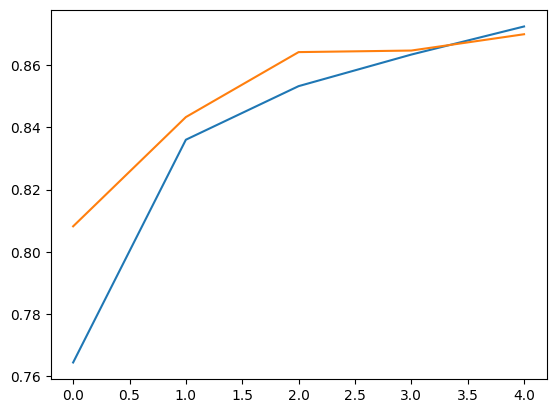

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

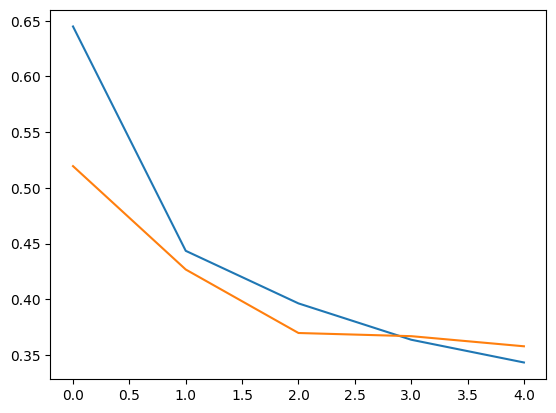

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [20]:
y_pred = model.predict(test_images)

313/313 [==============================] - 6s 19ms/step


In [21]:
import numpy as np
y_pred1 = np.argmax(y_pred,axis=1)
y_pred1

array([9, 2, 1, ..., 8, 1, 5])

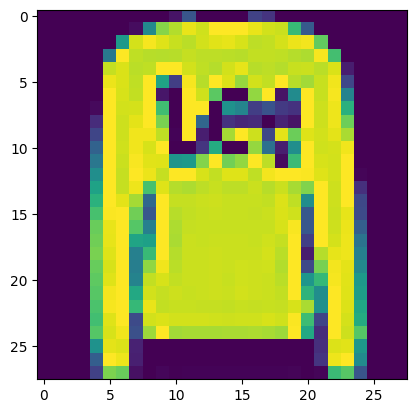

In [22]:
plt.imshow(test_images[1])

In [29]:
y_test[1]

2

In [30]:
import numpy as np
y_test = np.argmax(test_labels,axis=1)
y_test

array([9, 2, 1, ..., 8, 1, 5])

In [32]:
class_names =['T-shirt/top','Trouser','Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker','Bag','Ankle boot']

In [35]:
class_names[y_test[1]]

'Pullover'